In [5]:
import pandas as pd
pd.options.display.max_rows = 200

from IPython.display import HTML
HTML("<style>.container { width:100% !important; }</style>")

### Valores 2010 para variables seleccionadas.

In [18]:
frac = 0.01

In [58]:
df_list = []

for Q in ['2010-02-15', '2010-02-15', '2010-02-15', '2010-02-15']:
    df_ = pd.read_csv('./../data/Pobreza/pobreza_'+str(frac)+'_q'+Q+'.csv')
    
    df_list += [df_]
    
df = pd.concat(df_list)

In [67]:
len(df)/frac/4

40005400.0

In [59]:
df['CONDACT'] = df['CONDACT'].map({0: 'Menor de 14', 1: 'Ocup', 2: 'Desoc', 3: 'Inac'})
df['CAT_OCUP'] = df['CAT_OCUP'].map({0: 'n.a.', 1: 'Patron', 2: 'C. Propia', 3: 'Empleado', 4: 'Familiar'})
df['CAT_INAC'] = df['CAT_INAC'].map({0: 'n.a.', 1: 'Jubil', 2: 'Renta', 3: 'Estud', 4: 'Ama Casa', 5: 'Menor de 6', 6: 'Discap', 7: 'Otros'})


In [60]:
df.columns

Index(['index', 'RADIO_REF_ID', 'URP', 'DPTO', 'HOGAR_REF_ID', 'H15', 'H16',
       'PERSONA_REF_ID', 'P02', 'P03', 'P09', 'P10', 'CONDACT', 'IX_TOT',
       'CAT_OCUP', 'CAT_INAC', 'P47T_persona', 'ANO4', 'Q', 'P0910',
       'Grupo_Etario_3', 'Grupo_Etario_INDEC', 'Grupo_Etario_q10',
       'P47T_hogar', 'CBA', 'CBT', 'CB_EQUIV', 'Pobreza', 'Indigencia',
       'Pobreza_5usd', 'gap_pobreza', 'gap_indigencia', 'IDFRAC', 'PROV',
       'NOMPROV', 'AGLOMERADO', 'Region'],
      dtype='object')

In [71]:
tabla = df.groupby(['CONDACT', 'CAT_OCUP', 'CAT_INAC']).size().unstack([-2, -1]).sort_index(axis = 1)/4/frac
show = (tabla/1e6).round(2).fillna(0).replace(0, '')
show.to_excel('./personas_pob_total_CONDACT-CAT_OCUP-CAT_INAC.xlsx')
show

CAT_OCUP    C. Propia Empleado Familiar Patron     n.a.                     \
CAT_INAC         n.a.     n.a.     n.a.   n.a. Ama Casa Discap Estud Jubil   
CONDACT                                                                      
Desoc            0.06     1.31                                               
Inac                                               3.06   0.03  2.98  3.89   
Menor de 14               0.04                                  5.39         
Ocup             1.02    17.37     0.01   0.07                               

CAT_OCUP                                  
CAT_INAC    Menor de 6 Otros Renta  n.a.  
CONDACT                                   
Desoc                               0.05  
Inac                    0.44              
Menor de 14       3.99  0.07        0.21  
Ocup                                0.01

In [39]:
# tabla.sum().reset_index().astype(int)

In [68]:
tabla = df.groupby(['NOMPROV', 'CONDACT', 'CAT_OCUP', 'CAT_INAC']).size().unstack([-2, -1]).sort_index(axis = 1)/4/frac

In [70]:
show = (tabla/1e3).round(1).fillna(0).replace(0, '')
show.to_excel('./personas_pob_total_NOMPROV-CONDACT-CAT_OCUP-CAT_INAC.xlsx')
show

CAT_OCUP                                    C. Propia Empleado Familiar  \
CAT_INAC                                         n.a.     n.a.     n.a.   
NOMPROV                         CONDACT                                   
Buenos Aires                    Desoc            27.5    538.3            
                                Inac                                      
                                Menor de 14               11.3            
                                Ocup            412.5   7092.4      2.5   
Catamarca                       Desoc             0.4     12.8            
                                Inac                                      
                                Menor de 14                2.1            
                                Ocup              9.3    145.0      0.3   
Chaco                           Desoc             1.4     25.8            
                                Inac                                      
                                Menor de 14                0.5            
                                Ocup             31.1    375.9      0.8   
Chubut                          Desoc             0.6     17.4            
                                Inac                                      
                                Menor de 14                3.2            
                                Ocup             10.7    233.0            
Ciudad Autónoma de Buenos Aires Desoc             2.3     89.9            
                                Inac                                      
                                Menor de 14                3.1            
                                Ocup             73.6   1556.1      0.1   
Corrientes                      Desoc             0.9     24.6            
                                Inac                                      
                                Menor de 14                0.1            
                                Ocup             24.1    356.9      0.5   
Córdoba                         Desoc             5.2    104.0            
                                Inac                                      
                                Menor de 14                3.1            
                                Ocup             85.8   1444.3      0.4   
Entre Ríos                      Desoc             1.1     30.0            
                                Inac                                      
                                Menor de 14                0.4            
                                Ocup             33.4    506.5      0.2   
Formosa                         Desoc             0.5     12.3            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             15.4    182.0      0.4   
Jujuy                           Desoc             0.4     20.8            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             14.8    264.6      0.3   
La Pampa                        Desoc             0.3      9.9            
                                Inac                                      
                                Menor de 14                0.2            
                                Ocup             10.4    137.7            
La Rioja                        Desoc             0.7     12.9            
                                Inac                                      
                                Menor de 14                0.1            
                                Ocup              4.8    142.9      0.1   
Mendoza                         Desoc             3.3     66.6            
                                Inac                                      
                         

### Tabla: Poblacion en pobreza por aglomerado

In [4]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')
base_str = 'P'; grouper = ['Q', 'AGLOMERADO']; frac = 0.01
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [5]:
info.nunique()

observable       4
sintetico        7
base             1
Q                8
AGLOMERADO      33
timestamp        8
valor         1532
frac             1
dtype: int64

In [6]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-2, -1]).T.sort_index()/1e3

tabla_custom.head(20)

Q                        2010-02-15  2010-05-15  2010-08-15  2010-11-15  \
AGLOMERADO   observable                                                   
Bahia Blanca Pobreza           83.7        98.3        90.9        92.6   
             Total            293.7       293.7       293.7       293.7   
CABA         Pobreza          446.3       493.7       436.0       456.3   
             Total           2867.9      2867.9      2867.9      2867.9   
Catamarca    Pobreza           64.6        76.8        67.9        69.5   

Q                        2011-02-15  2011-05-15  2011-08-15  2011-11-15  
AGLOMERADO   observable                                                  
Bahia Blanca Pobreza           76.7        89.2        87.4        84.3  
             Total            288.0       288.0       288.0       288.0  
CABA         Pobreza          407.4       487.1       373.8       406.6  
             Total           2928.9      2928.9      2928.9      2928.9  
Catamarca    Pobreza           60.2        77.1        66.1        75.9

In [7]:
tabla_custom.to_excel('./personas_pob_total_AGLO.xlsx')

### Grafico: Dist ingresos por AGLO

In [8]:
import numpy as np


In [14]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'M24'; grouper = ['Q', 'AGLOMERADO']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Chequea valores de distintos timestamps
# info.groupby(['observable', 'sintetico', 'base'] + grouper).nunique().value_counts()

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()
# info.timestamp.hist()

## Introducir nombres de aglomerados
nomaglos = pd.read_csv('./../data/info/aglo_labels.csv')[['AGLOMERADO', 'NOMAGLO']]
info['AGLOMERADO'] = info['AGLOMERADO'].map(dict(nomaglos.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [15]:
ingresos = info.loc[info.observable.str.contains('P47T_')]
# info.observable.unique()
ingresos = ingresos[['sintetico', 'Q', 'AGLOMERADO', 'valor']]


In [18]:
ingresos_17 = ingresos.loc[ingresos['Q'].dt.year == 2010]

In [19]:
data = ingresos_17.groupby(['AGLOMERADO', 'sintetico'])['valor'].mean().unstack().sort_values('mean')

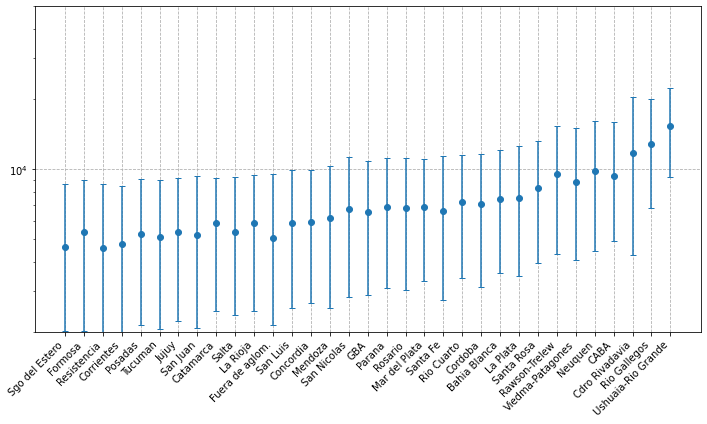

In [20]:
# _2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

# tabla_custom[_2017]

import matplotlib.pyplot as plt
 
nAGLOS = ingresos['AGLOMERADO'].nunique()
x = range(nAGLOS)


y = data['median']

# creating error
y_errormin = data['median'] - data['q25']
y_errormax = data['q75'] - data['median']

x_error = 0
y_error =[y_errormin, y_errormax]
 
# plotting graph
# plt.plot(x, y)
fig, ax = plt.subplots(1, figsize = (10, 6))
plt.errorbar(x, y, capsize = 3,
             yerr = y_error,
             xerr = x_error,
             fmt ='o')

ax.set_yticks(np.arange(2e3, 5e4, 2e3)); 
ax.set_xticks(range(nAGLOS))
ax.set_xticklabels(data.index.values)

plt.yscale('log'); plt.ylim(2e3, 5e4)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle = '--')
plt.savefig('./example_fig.png')
plt.show()

### Tabla: Poblacion en pobreza por provincia y Aglo si/no

In [21]:
# pd.read_csv('./../data/results/result_H_Q-AGLOMERADO.json')

base_str = 'P'; grouper = ['Q', 'PROV', 'AGLO_si']
info = pd.read_json('./../data/results/result_'+base_str+'_'+'-'.join(grouper)+'_'+str(frac)+'.json')
info['Q'] = pd.to_datetime(info['Q'])

## Pick latest timestamp for every value
info = info.sort_values('timestamp').groupby(['observable', 'sintetico', 'base'] + grouper).last().reset_index()

## Introducir nombres de provincia
nomprovs = pd.read_csv('./../data/info/prov_regs.csv')[['PROV', 'NOMPROV']]
info['PROV'] = info['PROV'].map(dict(nomprovs.values))

## Variables disponibles
# info[['observable', 'sintetico', 'base']].drop_duplicates()

In [22]:
pobreza_sum = info.loc[(info.observable.isin(['Total', 'Pobreza'])) & (info.sintetico == 'sum')]

tabla_custom = pobreza_sum.set_index(grouper + ['observable'])['valor'].unstack([-3, -2, -1]).T.sort_index()/1e3

tabla_custom.head()

Q                                2010-02-15  2010-05-15  2010-08-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza         1157.5      1261.6      1126.8   
                     Total           3104.1      3104.1      3104.1   
             True    Pobreza         4686.0      5066.1      4532.7   
                     Total          12512.2     12512.2     12512.2   
Catamarca    False   Pobreza          119.3       125.3       115.1   

Q                                2010-11-15  2011-02-15  2011-05-15  \
PROV         AGLO_si observable                                       
Buenos Aires False   Pobreza         1219.6      1098.0      1275.5   
                     Total           3104.1      3174.8      3174.8   
             True    Pobreza         4899.8      4392.3      4851.1   
                     Total          12512.2     12555.7     12555.7   
Catamarca    False   Pobreza          120.4       106.2       104.0   

Q                                2011-08-15  2011-11-15  
PROV         AGLO_si observable                          
Buenos Aires False   Pobreza         1079.4      1173.5  
                     Total           3174.8      3174.8  
             True    Pobreza         4344.4      4530.4  
                     Total          12555.7     12555.7  
Catamarca    False   Pobreza          111.1       109.1

In [13]:
tabla_custom.to_excel('./personas_pob_total_PROV_AGLOsi.xlsx')

## Graficos:

### Barras para cantidad de pobreza

In [14]:
_2017 = ['2017-02-15', '2017-05-15', '2017-08-15', '2017-11-15']

data = tabla_custom[_2017].mean(1).unstack([-1, -2]).sort_index(axis = 1)
data.head()

observable                         Pobreza               Total          
AGLO_si                              False      True     False     True 
PROV                                                                    
Buenos Aires                     1063.2750  4606.3625  3301.65  13604.55
Catamarca                         102.1125    66.7250   230.95    189.10
Chaco                             414.6500   179.4625   728.65    413.50
Chubut                             89.3625    75.5750   264.90    316.90
Ciudad Autónoma de Buenos Aires     0.0500   386.0000     1.25   2909.80

In [15]:
# import matplotlib.pyplot as plt
# colors = plt.cm.Paired.colors

# fig, ax = plt.subplots(1, figsize = (15, 10))
# # (data['Pobreza']+data['Total']).plot(kind='bar', color=[colors[1], colors[0]], rot=0, ax=ax) # stacked
# data['Total'].plot(kind='bar', color=['.5', '.5'], rot=0, ax=ax, alpha = .5)
# data['Pobreza'].plot(kind='bar', color=[colors[3], colors[2]], rot=0, ax=ax, alpha = 1)

# # legend_labels = [f'{val} ({context})' for val, context in data.columns]
# # ax.legend(legend_labels)

# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

### Ingreso por provincia